In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn.svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import sklearn.metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

from matplotlib import pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_df = pd.read_csv('data3.csv')
dataset = data_df.as_matrix()

In [3]:
X = dataset[:,4:14]
y = dataset[:,15]
standardized_X = preprocessing.scale(X)

In [4]:
seed = 58
results =[]

In [5]:
#Logistic Regression- StratifiedKFold 
logcvmodel = LogisticRegression()
logcvmodel_y_pred = cross_val_predict(logcvmodel,standardized_X, y, cv=10)
results.append(logcvmodel_y_pred)
print(metrics.classification_report(y, logcvmodel_y_pred))
print(metrics.confusion_matrix(y, logcvmodel_y_pred))
#............................
log_cv_scores = cross_val_score(logcvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(log_cv_scores)
print("The accuracy on Cross validation score in Logistic Regression:",log_cv_scores.mean())

             precision    recall  f1-score   support

        0.0       0.73      0.80      0.76       650
        1.0       0.70      0.62      0.66       494

avg / total       0.72      0.72      0.72      1144

[[518 132]
 [187 307]]
The accuracy on Cross validation score in Logistic Regression: 0.720900076278


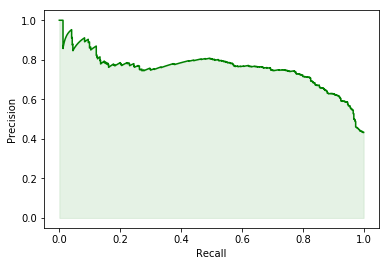

In [6]:
log_clf = logcvmodel.fit(standardized_X, y)
decision_values = log_clf.decision_function(standardized_X)
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)
plt.plot(recall, precision, color='green')
plt.fill_between(recall, precision, step='post', alpha=0.1,color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [7]:
#Decision Tree
dtcvmodel = DecisionTreeClassifier(random_state=seed)
dt_y_pred = cross_val_predict(dtcvmodel,standardized_X, y, cv=10)
results.append(dt_y_pred)
print(metrics.classification_report(y,dt_y_pred))
print(metrics.confusion_matrix(y, dt_y_pred))
#................................................................
dt_cv_scores = cross_val_score(dtcvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(dt_cv_scores)
print("The accuracy on cross validation score in Decision Tree:",dt_cv_scores.mean())

             precision    recall  f1-score   support

        0.0       0.76      0.64      0.69       650
        1.0       0.60      0.73      0.66       494

avg / total       0.69      0.68      0.68      1144

[[414 236]
 [134 360]]
The accuracy on cross validation score in Decision Tree: 0.676209000763


In [8]:
#Random Forest
rfccvmodel = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_y_pred = cross_val_predict(rfccvmodel,standardized_X, y, cv=10)
results.append(rf_y_pred)
print(metrics.classification_report(y, rf_y_pred))
print(metrics.confusion_matrix(y, rf_y_pred))
rf_cv_scores = cross_val_score(rfccvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(rf_cv_scores)
print("The accuracy on cross validation score in Random Forest:",rf_cv_scores.mean())

             precision    recall  f1-score   support

        0.0       0.80      0.72      0.76       650
        1.0       0.67      0.76      0.71       494

avg / total       0.74      0.74      0.74      1144

[[466 184]
 [118 376]]
The accuracy on cross validation score in Random Forest: 0.735675057208


In [9]:
#Extremely Random Trees
etcvmodel = ExtraTreesClassifier(random_state=seed)
et_y_pred= cross_val_predict(etcvmodel,standardized_X, y, cv=10)
results.append(et_y_pred)
print(metrics.classification_report(y, et_y_pred))
print(metrics.confusion_matrix(y, et_y_pred))
et_cv_scores = cross_val_score(etcvmodel, standardized_X, y, scoring='accuracy', cv=10)
#print(et_cv_scores)
print("The accuracy on cross validation score in Random Forest:",et_cv_scores.mean())

             precision    recall  f1-score   support

        0.0       0.76      0.72      0.74       650
        1.0       0.66      0.71      0.68       494

avg / total       0.72      0.72      0.72      1144

[[471 179]
 [145 349]]
The accuracy on cross validation score in Random Forest: 0.716407322654


In [10]:
#SVM Linear Kernel
svmcvlinear = SVC(kernel='linear', C=45.42)
linear_cv_error = cross_val_score(svmcvlinear, standardized_X, y, cv=10)
results.append(linear_cv_error)
print(linear_cv_error,"\n***************************************************************************")
print('\nThe {}-fold cross-validation accuracy score for linear SVM classifier is {:.2f}\n'.format(10, np.average(linear_cv_error)))

[ 0.71304348  0.87826087  0.73043478  0.86086957  0.77192982  0.8245614
  0.61403509  0.52631579  0.66666667  0.60526316] 
***************************************************************************

The 10-fold cross-validation accuracy score for linear SVM classifier is 0.72



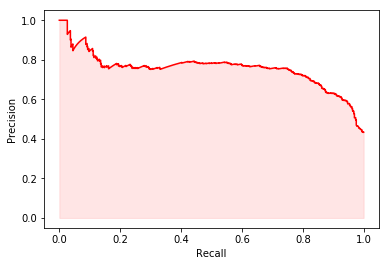

In [11]:
linearsvmclf = svmcvlinear.fit(standardized_X, y)
decision_values = linearsvmclf.decision_function(standardized_X)

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)

plt.plot(recall, precision, color='red')
plt.fill_between(recall, precision, step='post', alpha=0.1,color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [12]:
#SVM RBF Kernel
svmcvrbf = SVC(kernel='rbf', C= 31.21,gamma=0.00827)
rbf_cv_error = cross_val_score(svmcvrbf, standardized_X, y, cv=10)
results.append(rbf_cv_error)
print(rbf_cv_error,"\n***************************************************************************")
print('\nThe {}-fold cross-validation accuracy score for classifier is {:.2f}\n'.format(10, np.average(rbf_cv_error)))

[ 0.80869565  0.8173913   0.67826087  0.82608696  0.86842105  0.85964912
  0.62280702  0.57894737  0.75438596  0.62280702] 
***************************************************************************

The 10-fold cross-validation accuracy score for classifier is 0.74



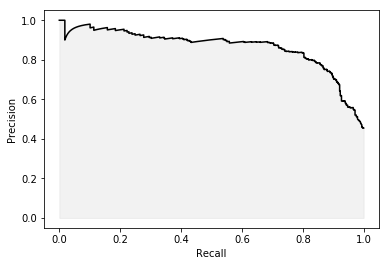

In [13]:
rbfsvmclf = svmcvrbf.fit(standardized_X, y)
decision_values = rbfsvmclf.decision_function(standardized_X)

precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)

plt.plot(recall, precision, color='black')
plt.fill_between(recall, precision, step='post', alpha=0.1,color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [14]:
#SVM NPolynomial Kernel
svmcvpoly = SVC(kernel='poly',C= 35.673,gamma=0.0422)
poly_cv_error = cross_val_score(svmcvpoly, standardized_X, y, cv=10)
results.append(poly_cv_error)
print(poly_cv_error,"\n***************************************************************************")
print('\nThe {}-fold cross-validation accuracy score for classifier is {:.2f}\n'.format(10, np.average(poly_cv_error)))

[ 0.72173913  0.87826087  0.65217391  0.86956522  0.73684211  0.72807018
  0.61403509  0.56140351  0.70175439  0.66666667] 
***************************************************************************

The 10-fold cross-validation accuracy score for classifier is 0.71



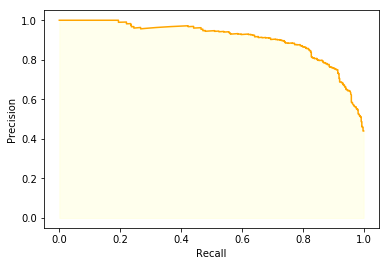

In [15]:
polysvmclf = svmcvpoly.fit(standardized_X, y)
decision_values = polysvmclf.decision_function(standardized_X)
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y, decision_values)
plt.plot(recall, precision, color='orange',markerfacecolor='blue', markersize=12)
plt.fill_between(recall, precision, step='post', alpha=0.07,color='yellow')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [16]:
# Voting Ensemble for Classification
from sklearn import model_selection


#kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
estimators.append(('logistic', logcvmodel))
estimators.append(('randomforest', rfccvmodel))
estimators.append(('extratreeforest', etcvmodel))
estimators.append(('svmlinear', svmcvlinear))
estimators.append(('svmrbf', svmcvrbf))
estimators.append(('svmpoly', svmcvpoly))
# create the ensemble model
ensemble = VotingClassifier(estimators, voting='hard')
results = model_selection.cross_val_score(ensemble, standardized_X, y, cv=10)
print(results.mean())

0.731380625477
